In [1]:
from beliefPOMDPFunctions import *
import sys
sys.path.append('../')
from SetupTransitionTable import SetupDeterministicTransitionByStateSet
from SetupRewardTable import SetupStateActionRewardWithUserSpecifiedCosts
from visualizations import *
from ValueIteration import *

In [2]:
# Actions correspond to E, N, W, S, Stay respectively
allActions = [(1,0), (0,1), (-1,0), (0,-1), (0,0)]

#all location states in grid
gridWidth = 5
gridHeight = 4
gridSet = set(itertools.product(range(gridWidth), range(gridHeight)))
barriersC = {(2,2), (3,2), (4,2)}

#final environment state sets
stateSetC = list(gridSet.difference(barriersC))

#goal locations
goalTruck1 = (0,0)
goalTruck2 = (4,3)

#possible beliefs
beliefSet= list(set([t for t in itertools.permutations([1,0,0,0,0,0], 6)]))
otherHypotheses = [(.5,.5,0,0,0,0),(0,0,.5,.5,0,0),(0,0,0,0,.5,.5),(0,0,.5,0,0.5,0),(.5,0,0,0,0,0.5),(0,.5,0,.5,0,0),(.17,.17,.17,.17,.17,.17)]
beliefSet.extend(otherHypotheses)

In [3]:
getTransition = SetupDeterministicTransitionByStateSet(stateSetC, allActions)
positionTransition = getTransition()

getTransitionC = SetupBeliefTransition(stateSetC, beliefSet, allActions)
beliefTransition_EnvC = getTransitionC(updateBelief)

In [4]:
allWorlds = ['KL', 'KM', 'LK', 'LM', 'MK', 'ML']
allPreferences = [''.join(preference) for preference in itertools.permutations("KLM",3)]
allPreferences

['KLM', 'KML', 'LKM', 'LMK', 'MKL', 'MLK']

In [5]:
getRewardC = SetupStateActionRewardWithUserSpecifiedCosts(positionTransition, allActions, [goalTruck1,goalTruck2])

rewards_EnvC_PrefKLM = [getRewardC(constructGoalStateRewards(world, 'KLM')) for world in allWorlds]
rewards_EnvC_PrefKML = [getRewardC(constructGoalStateRewards(world, 'KML')) for world in allWorlds]
rewards_EnvC_PrefLKM = [getRewardC(constructGoalStateRewards(world, 'LKM')) for world in allWorlds]
rewards_EnvC_PrefLMK = [getRewardC(constructGoalStateRewards(world, 'LMK')) for world in allWorlds]
rewards_EnvC_PrefMKL = [getRewardC(constructGoalStateRewards(world, 'MKL')) for world in allWorlds]
rewards_EnvC_PrefMLK = [getRewardC(constructGoalStateRewards(world, 'MLK')) for world in allWorlds]

getRewardBeliefs = SetupRewardBeliefTable(stateSetC, beliefSet, allActions)

beliefReward_EnvC_KLM = getRewardBeliefs(beliefTransition_EnvC, rewards_EnvC_PrefKLM)
beliefReward_EnvC_KML = getRewardBeliefs(beliefTransition_EnvC, rewards_EnvC_PrefKML)
beliefReward_EnvC_LKM = getRewardBeliefs(beliefTransition_EnvC, rewards_EnvC_PrefLKM)
beliefReward_EnvC_LMK = getRewardBeliefs(beliefTransition_EnvC, rewards_EnvC_PrefLMK)
beliefReward_EnvC_MKL = getRewardBeliefs(beliefTransition_EnvC, rewards_EnvC_PrefMKL)
beliefReward_EnvC_MLK = getRewardBeliefs(beliefTransition_EnvC, rewards_EnvC_PrefMLK)

# Construct Preference Policies

In [6]:
valueTable = {state:0 for state in beliefTransition_EnvC.keys()}

getPolicy_EnvC_KLM = BoltzmannValueIteration(beliefTransition_EnvC, beliefReward_EnvC_KLM, valueTable, 10e-7, .99, .8)
optimalValues_KLM, policy_EnvC_KLM = getPolicy_EnvC_KLM()

getPolicy_EnvC_KML = BoltzmannValueIteration(beliefTransition_EnvC, beliefReward_EnvC_KML, valueTable, 10e-7, .99, .8)
optimalValues_KML, policy_EnvC_KML = getPolicy_EnvC_KML()

getPolicy_EnvC_LKM = BoltzmannValueIteration(beliefTransition_EnvC, beliefReward_EnvC_LKM, valueTable, 10e-7, .99, .8)
optimalValues_LKM, policy_EnvC_LKM = getPolicy_EnvC_LKM()

getPolicy_EnvC_LMK = BoltzmannValueIteration(beliefTransition_EnvC, beliefReward_EnvC_LMK, valueTable, 10e-7, .99, .8)
optimalValues_LMK, policy_EnvC_LMK = getPolicy_EnvC_LMK()

getPolicy_EnvC_MKL = BoltzmannValueIteration(beliefTransition_EnvC, beliefReward_EnvC_MKL, valueTable, 10e-7, .99, .8)
optimalValues_MKL, policy_EnvC_MKL = getPolicy_EnvC_MKL()

getPolicy_EnvC_MLK = BoltzmannValueIteration(beliefTransition_EnvC, beliefReward_EnvC_MLK, valueTable, 10e-7, .99, .8)
optimalValues_MLK, policy_EnvC_MLK = getPolicy_EnvC_MLK()

scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 0, 1, 0))
scaling exponents to [0,700]... On State:
((0, 0), (1, 0, 0, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 1, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 1, 0, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 1, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 0, 0, 1))
scaling exponents to [0,700]... On State:
((0, 0), (0.5, 0.5, 0, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0.5, 0.5, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 0, 0.5, 0.5))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0.5, 0, 0.5, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0.5, 0, 0, 0, 0, 0.5))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0.5, 0, 0.5, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0.17, 0.17, 0.17, 0.17, 0.17, 0.17))
scaling exponents to [0,700]... On 

scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 0, 1, 0))
scaling exponents to [0,700]... On State:
((0, 0), (1, 0, 0, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 1, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 1, 0, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 1, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 0, 0, 1))
scaling exponents to [0,700]... On State:
((0, 0), (0.5, 0.5, 0, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0.5, 0.5, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 0, 0.5, 0.5))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0.5, 0, 0.5, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0.5, 0, 0, 0, 0, 0.5))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0.5, 0, 0.5, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0.17, 0.17, 0.17, 0.17, 0.17, 0.17))
scaling exponents to [0,700]... On 

scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 0, 1, 0))
scaling exponents to [0,700]... On State:
((0, 0), (1, 0, 0, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 1, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 1, 0, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 1, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 0, 0, 1))
scaling exponents to [0,700]... On State:
((0, 0), (0.5, 0.5, 0, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0.5, 0.5, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 0, 0.5, 0.5))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0.5, 0, 0.5, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0.5, 0, 0, 0, 0, 0.5))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0.5, 0, 0.5, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0.17, 0.17, 0.17, 0.17, 0.17, 0.17))
scaling exponents to [0,700]... On 

scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 0, 1, 0))
scaling exponents to [0,700]... On State:
((0, 0), (1, 0, 0, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 1, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 1, 0, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 1, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 0, 0, 1))
scaling exponents to [0,700]... On State:
((0, 0), (0.5, 0.5, 0, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0.5, 0.5, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 0, 0.5, 0.5))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0.5, 0, 0.5, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0.5, 0, 0, 0, 0, 0.5))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0.5, 0, 0.5, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0.17, 0.17, 0.17, 0.17, 0.17, 0.17))
scaling exponents to [0,700]... On 

scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 0, 1, 0))
scaling exponents to [0,700]... On State:
((0, 0), (1, 0, 0, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 1, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 1, 0, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 1, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 0, 0, 1))
scaling exponents to [0,700]... On State:
((0, 0), (0.5, 0.5, 0, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0.5, 0.5, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 0, 0.5, 0.5))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0.5, 0, 0.5, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0.5, 0, 0, 0, 0, 0.5))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0.5, 0, 0.5, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0.17, 0.17, 0.17, 0.17, 0.17, 0.17))
scaling exponents to [0,700]... On 

scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 0, 1, 0))
scaling exponents to [0,700]... On State:
((0, 0), (1, 0, 0, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 1, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 1, 0, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 1, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 0, 0, 1))
scaling exponents to [0,700]... On State:
((0, 0), (0.5, 0.5, 0, 0, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0.5, 0.5, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0, 0, 0.5, 0.5))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0, 0.5, 0, 0.5, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0.5, 0, 0, 0, 0, 0.5))
scaling exponents to [0,700]... On State:
((0, 0), (0, 0.5, 0, 0.5, 0, 0))
scaling exponents to [0,700]... On State:
((0, 0), (0.17, 0.17, 0.17, 0.17, 0.17, 0.17))
scaling exponents to [0,700]... On 

KLM 



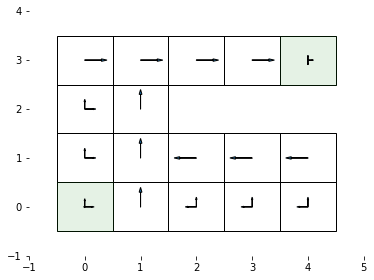

['KL', 'KM', 'LK', 'LM', 'MK', 'ML'] 
 [0, 0, 0, 0, 0, 1] None


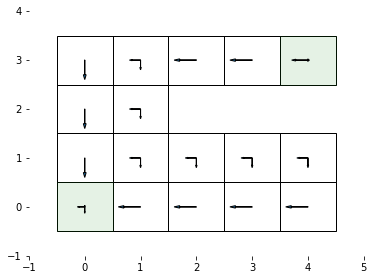

['KL', 'KM', 'LK', 'LM', 'MK', 'ML'] 
 [0.5, 0.5, 0, 0, 0, 0] None


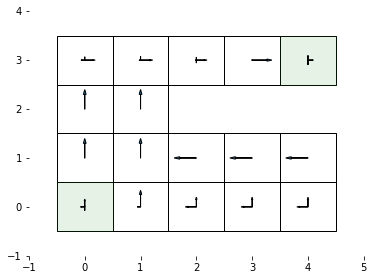

['KL', 'KM', 'LK', 'LM', 'MK', 'ML'] 
 [0, 0, 0.5, 0.5, 0, 0] None


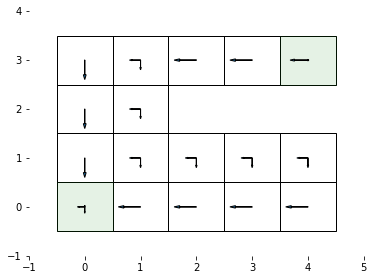

['KL', 'KM', 'LK', 'LM', 'MK', 'ML'] 
 [0, 0.5, 0, 0.5, 0, 0] None


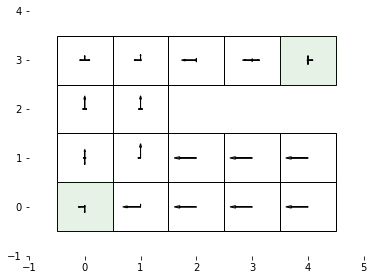

['KL', 'KM', 'LK', 'LM', 'MK', 'ML'] 
 [0.17, 0.17, 0.17, 0.17, 0.17, 0.17] None


[None, None, None, None, None]

In [7]:
selectedBeliefs = [(0,0,0,0,0,1), (.5,.5,0,0,0,0), (0,0,.5,.5,0,0), (0,.5,0,.5,0,0), (.17,.17,.17,.17,.17,.17)]
print("KLM \n")
[print(allWorlds,"\n",list(b), visualizePolicyOfBeliefByState(stateSetC, policy_EnvC_KLM, b, goalStates = [goalTruck1, goalTruck2])) for b in selectedBeliefs]


# Example Sampled Trajectories

In [8]:
np.random.seed(130)
path1 = samplePathToGoal((4,1), (.17,.17,.17,.17,.17,.17), policy_EnvC_MLK, beliefTransition_EnvC, [(0,0), (4,3)])
positionTrajectory1 = [pos for pos, belief in path1]

world1 = convertBeliefToTruck(path1[-1][1])
worldNames1 = {(0,0): world1[0], (4,3):world1[1]}

In [10]:
np.random.seed(3)
path2 = samplePathToGoal((4,1), (.17,.17,.17,.17,.17,.17), policy_EnvC_LKM, beliefTransition_EnvC, [(0,0), (4,3)])
positionTrajectory2 = [pos for pos, belief in path2]

world2 = convertBeliefToTruck(path2[-1][1])
worldNames2 = {(0,0): world2[0], (4,3):world2[1]}

In [12]:
np.random.seed(3)
path3 = samplePathToGoal((4,1), (.17,.17,.17,.17,.17,.17), policy_EnvC_KML, beliefTransition_EnvC, [(0,0), (4,3)])
positionTrajectory3 = [pos for pos, belief in path3]

world3 = convertBeliefToTruck(path3[-1][1])
worldNames3 = {(0,0): world3[0], (4,3):world3[1]}

# Perform Inference

In [14]:
preferencePolicies = [policy_EnvC_KLM, policy_EnvC_KML, policy_EnvC_LKM,policy_EnvC_LMK, policy_EnvC_MKL, policy_EnvC_MLK]
#desirePriors = [1/6,1/6,1/6,1/6,1/6,1/6]
#desirePriors = [.160,.163,.166,.169,.172,.175]
desirePriors = [.1666,.167,.1675,.168,.1685,.169]

stateT1 = inferBelief(positionTrajectory1, world1)
stateT2 = inferBelief(positionTrajectory2, world2)
stateT3 = inferBelief(positionTrajectory3, world3)

getPreferencePosterior1 = PerformDesireInference(beliefTransition_EnvC, preferencePolicies, desirePriors, stateT1)
posterior1 = getPreferencePosterior1()

getPreferencePosterior2 = PerformDesireInference(beliefTransition_EnvC, preferencePolicies, desirePriors, stateT2)
posterior2 = getPreferencePosterior2()

getPreferencePosterior3 = PerformDesireInference(beliefTransition_EnvC, preferencePolicies, desirePriors, stateT3)
posterior3 = getPreferencePosterior3()

In [15]:
stateT1

[((4, 1), (0.17, 0.17, 0.17, 0.17, 0.17, 0.17)),
 ((3, 1), (0.0, 0.0, 0.5, 0.5, 0.0, 0.0)),
 ((2, 1), (0.0, 0.0, 0.5, 0.5, 0.0, 0.0)),
 ((1, 1), (0.0, 0.0, 0.5, 0.5, 0.0, 0.0)),
 ((1, 2), (0.0, 0.0, 0.5, 0.5, 0.0, 0.0)),
 ((1, 3), (0.0, 0.0, 1.0, 0.0, 0.0, 0.0)),
 ((0, 3), (0.0, 0.0, 1.0, 0.0, 0.0, 0.0)),
 ((0, 2), (0.0, 0.0, 1.0, 0.0, 0.0, 0.0)),
 ((0, 1), (0.0, 0.0, 1.0, 0.0, 0.0, 0.0)),
 ((0, 0), (0.0, 0.0, 1.0, 0.0, 0.0, 0.0))]

In [21]:
stateT2

[((4, 1), (0.17, 0.17, 0.17, 0.17, 0.17, 0.17)),
 ((3, 1), (0.0, 0.0, 0.5, 0.5, 0.0, 0.0)),
 ((3, 0), (0.0, 0.0, 0.5, 0.5, 0.0, 0.0)),
 ((2, 0), (0.0, 0.0, 0.5, 0.5, 0.0, 0.0)),
 ((1, 0), (0.0, 0.0, 0.5, 0.5, 0.0, 0.0)),
 ((0, 0), (0.0, 0.0, 0.5, 0.5, 0.0, 0.0))]

In [22]:
stateT3

[((4, 1), (0.17, 0.17, 0.17, 0.17, 0.17, 0.17)),
 ((3, 1), (0.0, 0.0, 0.5, 0.5, 0.0, 0.0)),
 ((2, 1), (0.0, 0.0, 0.5, 0.5, 0.0, 0.0)),
 ((1, 1), (0.0, 0.0, 0.5, 0.5, 0.0, 0.0)),
 ((1, 2), (0.0, 0.0, 0.5, 0.5, 0.0, 0.0)),
 ((1, 3), (0.0, 0.0, 0.0, 1.0, 0.0, 0.0)),
 ((2, 3), (0.0, 0.0, 0.0, 1.0, 0.0, 0.0)),
 ((3, 3), (0.0, 0.0, 0.0, 1.0, 0.0, 0.0)),
 ((4, 3), (0.0, 0.0, 0.0, 1.0, 0.0, 0.0))]

In [16]:
def plotPosteriors(posteriors, title="", labels=['KLM', 'KML', 'LKM', 'LMK', 'MKL', 'MLK'], subplotRowNumber = 2, subplotColNumber = 3, figDim = (10,5)):
    x, y  = posteriors.shape
    fig, ax = plt.subplots(nrows=subplotRowNumber, ncols=subplotColNumber, figsize = figDim)
    colors = plt.cm.viridis(np.linspace(0,1,y))
    plotIndex = 0 
    for row in ax:
        for col in row:
            col.plot(range(x), posteriors[:,plotIndex], color = colors[plotIndex], label = labels[plotIndex])
            col.legend()
            plotIndex += 1
    fig.suptitle(title)
    plt.show()

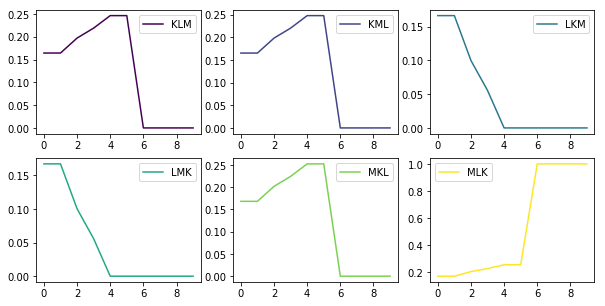

In [17]:
plotPosteriors(posterior1)

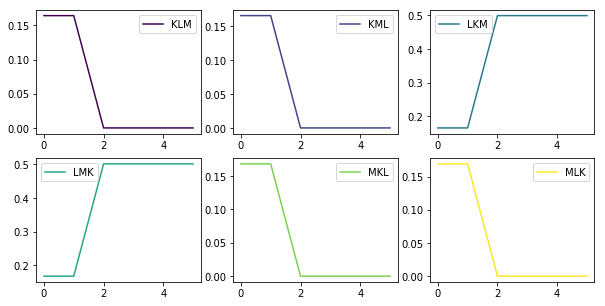

In [18]:
plotPosteriors(posterior2)

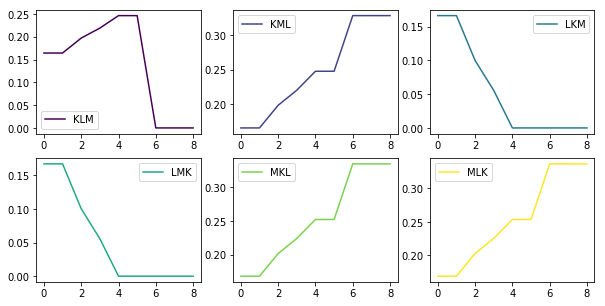

In [19]:
plotPosteriors(posterior3)

In [20]:
print(posterior3)

[[1.64352670e-01 1.65142826e-01 1.66133185e-01 1.67126505e-01
  1.68122786e-01 1.69122028e-01]
 [1.64352670e-01 1.65142826e-01 1.66133185e-01 1.67126505e-01
  1.68122786e-01 1.69122028e-01]
 [1.97180440e-01 1.98128352e-01 9.97444363e-02 1.00340814e-01
  2.01703529e-01 2.02902429e-01]
 [2.19078727e-01 2.20131836e-01 5.54588016e-02 5.57903931e-02
  2.24104059e-01 2.25436183e-01]
 [2.46463857e-01 2.47724978e-01 2.41491574e-08 2.42935477e-08
  2.52195113e-01 2.53616004e-01]
 [2.46425909e-01 2.47763156e-01 9.33603396e-15 9.39185565e-15
  2.52233980e-01 2.53576955e-01]
 [1.20243300e-07 3.28788980e-01 4.78183103e-21 4.81042272e-21
  3.34714386e-01 3.36496513e-01]
 [8.81782800e-14 3.28798320e-01 3.68261490e-27 3.70463412e-27
  3.34709789e-01 3.36491891e-01]
 [8.82110824e-18 3.28807533e-01 1.12984488e-31 7.17824848e-31
  3.34705195e-01 3.36487272e-01]]
